In [1]:
import sys
sys.path.append("/Users/anirudhnatarajan/Documents/UPenn/McNeuron")
import McNeuron
import pickle
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import statistics as s
from scipy import stats
import plotly
plotly.tools.set_credentials_file(username='anirudhn',
                                 api_key='uaV7Q410noAGBd4zvNTS')
%matplotlib inline  

In [2]:
tree_data = pickle.load(open('.././trees/tree_data.csv', 'rb'))

In [3]:
trees = tree_data.sort_values(['location'])
trees = trees.reset_index(drop=True)

In [94]:
index = 6
swc = trees['swc'][index]
tree = McNeuron.Neuron(swc)
tree.basic_features()
#McNeuron.visualize.plot_2D(tree, axis=(1,0,0), rotation=30)

In [93]:
#McNeuron.visualize.plot_3D(tree)

In [9]:
def splitBranches(tree) :
    branches = np.where(tree.features['branch order']>=2)[0]
    numOfBranch = len(branches)
    subsets = [0] * numOfBranch
    for i in range(0,numOfBranch) :
        rest_swc = tree.get_rest_of_neuron_after_node(branches[i])
        n = McNeuron.Neuron(rest_swc)
        n.l_measure_features()
        subsets[i] = n.getNeuronVector()
    return subsets

In [10]:
def getTreeBranchMaster(location):
    ind = np.where(trees['location']==location)[0]
    treeBranchMaster = [0] * len(ind)
    for i in range (0,len(ind)) :
        tree = McNeuron.Neuron(trees['swc'][ind[i]])
        tree.basic_features()
        treeBranchMaster[i] = splitBranches(tree)
        print(ind[i])
    return treeBranchMaster

In [11]:
treeBranchMasterG = getTreeBranchMaster('Gabon')
print('done')
treeBranchMasterH = getTreeBranchMaster('Ghana')
print('done')
# treeBranchMasterU = getTreeBranchMaster('UK')
print('done')
treeBranchMasterW = getTreeBranchMaster('Wytham Meteoc (UK)')
print('done')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
done
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
done
done
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
done


In [301]:
def getFeature(feature, arr) :
    featureArray = [0] * len(arr)
    counter = 0
    for i in range(0, len(arr)) :
        x = [0] * len(arr[i])
        for j in range(0,len(arr[i])) :
            x[j] = arr[i][j][feature]
        featureArray[i-counter] = x
        if(len(x)==0) :
            featureArray = np.delete(featureArray,i)
            counter += 1
    return featureArray

In [302]:
def getFeatureAnalysisMatrixTree(feature) :
    featureG = getFeature(feature,treeBranchMasterG)
    featureH = getFeature(feature,treeBranchMasterH)
    featureW = getFeature(feature,treeBranchMasterW)
    matrix = np.zeros((3,3))
    ref = [featureG,featureH,featureW]
    ind = [[0,0],[0,1],[0,2],[1,1],[1,0],[1,2],[2,2],[2,1],[2,0]]
    for v in range(0,9) :
        total = 0
        a = ref[ind[v][0]]
        b = ref[ind[v][1]]
        for i in range(0,20) :
            start = 0
            if v%3==0 :
                start = i
            for j in range(start,20) :
                pdf0 = np.histogram(a[i],normed=True, bins=20, range=(0, .07))[0]
                pdf1 = np.histogram(b[j],normed=True, bins=20, range=(0, .07))[0]
                pdf0 = pdf0/sum(pdf0)
                pdf1 = pdf1/sum(pdf1)
                if (stats.ks_2samp(pdf0,pdf1)[1] < 0.05) :
                    total += 1
        matrix[ind[v][0]][ind[v][1]] = total
        print(v)
    return matrix

In [303]:
getFeatureAnalysisMatrixTree(17)

0
1
2
3
4
5
6
7
8


array([[  0.,  84., 384.],
       [ 84.,  12., 184.],
       [384., 184.,   0.]])

(array([ 80.42797345, 160.85594691,   0.        , 160.85594691,
        321.71189382,  80.42797345,   0.        , 402.13986727,
        241.28392036, 160.85594691]),
 array([0.0057439 , 0.00636558, 0.00698725, 0.00760893, 0.0082306 ,
        0.00885227, 0.00947395, 0.01009562, 0.0107173 , 0.01133897,
        0.01196065]),
 <a list of 10 Patch objects>)

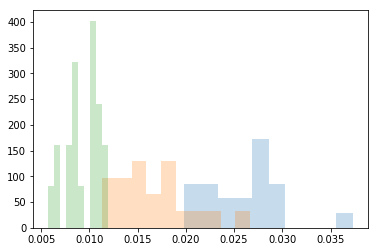

In [462]:
featureG = getFeature(17,treeBranchMasterG)
featureH = getFeature(17,treeBranchMasterH)
featureW = getFeature(17,treeBranchMasterW)
meanG = [0] * len(featureG)
meanH = [0] * len(featureH)
meanW = [0] * len(featureW)
for i in range(0,20):
    meanG[i] = s.mean(featureG[i])
    meanH[i] = s.mean(featureH[i])
    meanW[i] = s.mean(featureW[i])
plt.hist(meanG,normed=True,bins=10,alpha=0.25)
# plt.show()
plt.hist(meanH,normed=True,bins=10,alpha=0.25)
# plt.show()
plt.hist(meanW,normed=True,bins=10,alpha=0.25)
# plt.show()


In [95]:
import pandas as pd
neurons = pd.read_pickle("/Users/anirudhnatarajan/Documents/UPenn/neuronData/neurons.csv")

In [122]:
indC = np.where(neurons['Experimental Condition']=='Control')[0]
indD = np.where(neurons['Species Name']=='drosophila melanogaster')[0]
indO = np.where(neurons['Primary Brain Region']=='optic Lobe')[0]
indP = np.where(neurons['Primary Brain Region']=='protocerebrum')[0]
swcO = [0] * 7099
swcP = [0] * 8890

counter = 0
for i in range(0,len(indD)) :
    if np.any(indC[:] == indD[i]) & np.any(indO[:] == indD[i]) :
        swcO[counter] = neurons['swc'][indD[i]]
        counter += 1

counter = 0
for i in range(0,len(indD)) :
    if np.any(indC[:] == indD[i]) & np.any(indP[:] == indD[i]) :
        swcP[counter] = neurons['swc'][indD[i]]
        counter += 1

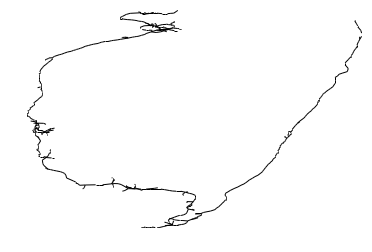

In [438]:
McNeuron.visualize.plot_2D(swcP[7653])

In [123]:
def getNeurons(swc, size, rand) :
    n = [0] * size
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        n[i] = McNeuron.Neuron(swc[int(rand[r])])
        rand = np.delete(rand,r)
        if i%100==0 :
            print(i)
    print('done')
    return n,rand

In [439]:
size = 80
randO = np.linspace(0,len(swcO)-1,len(swcO))
randP = np.linspace(0,len(swcP)-1,len(swcP))
neuronO,randO = getNeurons(swcO, size, randO)
neuronP,randP = getNeurons(swcP, size, randP)
neuronO = np.vstack(neuronO)
neuronP = np.vstack(neuronP)

0
done
0
done


In [440]:
def getNeuronBranchMaster(arr):
    neuronBranchMaster = [0] * len(arr)
    for i in range (0,len(arr)) :
        n = arr[i,0]
        n.basic_features()
        neuronBranchMaster[i] = splitBranches(n)
        if i%10==0 :
            print(i)
    print('done')
    return neuronBranchMaster

In [441]:
neuronBranchMasterO = getNeuronBranchMaster(neuronO)
neuronBranchMasterP = getNeuronBranchMaster(neuronP)

0
10
20
30
40
50
60
70
done
0
10
20
30
40
50
60
70
done


In [442]:
def getFeatureAnalysisMatrixNeuron(feature,ran) :
    featureO = getFeature(feature,neuronBranchMasterO)
    featureP = getFeature(feature,neuronBranchMasterP)
    matrix = np.zeros((2,2))
    ref = [featureO,featureP]
    ind = [[0,0],[0,1],[1,1],[1,0]]
    for v in range(0,4) :
        total = 0
        a = ref[ind[v][0]]
        b = ref[ind[v][1]]
        for i in range(0,len(featureO)) :
            start = 0
            if v%2==0 :
                start = i
            for j in range(start,len(featureO)) :
                pdf0 = np.histogram(a[i],normed=True, bins=len(featureO), range=ran)[0]
                pdf1 = np.histogram(b[j],normed=True, bins=len(featureO), range=ran)[0]
                pdf0 = pdf0/sum(pdf0)
                pdf1 = pdf1/sum(pdf1)
                if (stats.ks_2samp(pdf0,pdf1)[1] < 0.05) :
                    total += 1
        matrix[ind[v][0]][ind[v][1]] = total
        print(v)
    return matrix

In [445]:
getFeatureAnalysisMatrixNeuron(17, (0,0.3))

0
1
2
3


array([[ 872., 1399.],
       [1399.,  497.]])

(array([14.81481481,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 14.81481481,
        37.03703704,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 array([0.   , 0.015, 0.03 , 0.045, 0.06 , 0.075, 0.09 , 0.105, 0.12 ,
        0.135, 0.15 , 0.165, 0.18 , 0.195, 0.21 , 0.225, 0.24 , 0.255,
        0.27 , 0.285, 0.3  ]),
 <a list of 20 Patch objects>)

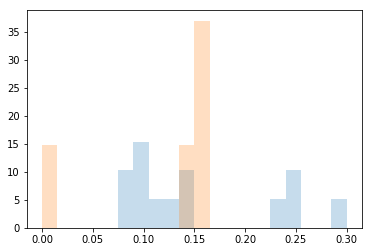

In [446]:
featureO = getFeature(17,neuronBranchMasterO)
featureP = getFeature(17,neuronBranchMasterP)
meanO = [0] * len(featureO)
meanP = [0] * len(featureP)
for i in range(0,len(featureO)):
    meanO[i] = s.mean(featureO[i])
    meanP[i] = s.mean(featureP[i])
plt.hist(meanO,normed=True,bins=20,alpha=0.25,range=(0,0.3))
# plt.show()
plt.hist(meanP,normed=True,bins=20,alpha=0.25,range=(0,0.3))
# plt.show()

In [322]:
def getVectors(swc, size, rand) :
    n = [0] * size
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(swc[int(rand[r])])
        rand = np.delete(rand,r)
        neuron.l_measure_features()
        n[i] = neuron.getNeuronVector()
    return n,rand

In [316]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import neighbors
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model

In [325]:
def getFeatureImportance(length, featureNum) :
    """
    getFeatureImportance uses the subsetData function to generate a matrix with a large number of individual feature accuracies.

    Parameters:
    -----------
    length: int
        how many times the function will get new data and test the accuracy of individual features 
    featureNum: int
        the number of features needed to be tested

    Return:
    -------
    getFeatureImportance returns a matrix of shape (featureNum,length) with all values filled with the accuracy of each feature

    """
    
    masterFeature = np.zeros([featureNum, length])
    for l in range (0,length) :
        randO = np.linspace(0,len(swcO)-1,len(swcO))
        randP = np.linspace(0,len(swcP)-1,len(swcP))
        trainO,randO = getVectors(swcO, size, randO)
        trainP,randP = getVectors(swcP, size, randP)
        testO,randO = getVectors(swcO, size, randO)
        testP,randP = getVectors(swcP, size, randP)
        for q in range(0,featureNum) :
            a = subsetData(trainO,q)
            b = subsetData(trainP,q)
            c = subsetData(testO,q)
            d = subsetData(testP,q)

            train = np.expand_dims(np.concatenate((a,b)),axis=1)
            test = np.expand_dims(np.concatenate((c,d)),axis=1)

            y = np.concatenate(([0] * size,[1] * size))
            clf = BaggingClassifier(RandomForestClassifier())
            clf.fit(train,y)
            z = clf.predict(test)

            sum = 0
            parts = 2
            for i in range (0,parts) :
                for j in range (0,size) :
                    if z[j + size*i] == i :
                        sum += 1
            accuracy = sum / len(z)
            masterFeature[q, l] = accuracy
        print(l)
    return masterFeature

In [319]:
def subsetData(arr,q):
    """
    subsetData is used to split the data into lists with only 1 classifying feature in order to test how important each feature is individually for classification

    Parameters:
    -----------
    arr: array or list
        the master array that contains all the features
    q: int
        the index of the desired feature

    Return:
    -------
    subsetData returns an array with only 1 classifying feature

    """
    
    x = [0] * size
    for i in range(0,size) :
        x[i] = arr[i][q]
    return x

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


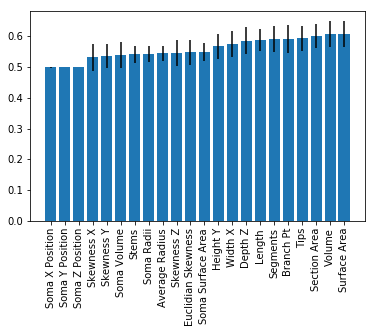

In [328]:
featureNames = ['Width X', 'Height Y', 'Depth Z', 'Soma X Position', \
                'Soma Y Position', 'Soma Z Position', 'Soma Radii', \
                'Soma Surface Area', 'Soma Volume', 'Skewness X', \
                'Skewness Y', 'Skewness Z', 'Euclidian Skewness', \
                'Length', 'Surface Area', 'Section Area', 'Volume', \
                'Average Radius', 'Tips', 'Stems', 'Branch Pt', 'Segments']           
featureNum = len(featureNames)
size = 80
masterFeature = getFeatureImportance(50, featureNum)
values = np.zeros([2,featureNum])
for i in range(0,featureNum) :
    values[0,i] = masterFeature[i,:].mean()
    values[1,i] = masterFeature[i,:].std()
featureNames = np.vstack(featureNames)
index = np.argsort(values[0,:])
featureRange = np.linspace(0,featureNum-1,featureNum)
plt.bar(featureRange,values[0,index], yerr = values[1,index])
plt.xticks(featureRange,featureNames[index,0], rotation='vertical')
plt.subplots_adjust(bottom=0.15)

plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Misc/featureImportanceNeurons.eps')

In [388]:
swc = tree.get_swc()
S = McNeuron.subsample.Subsample()
S.set_swc(swc)
S.fit()
standard_swc = S.subsample(subsample_type='straigthen', length = 1)

In [393]:
location = standard_swc[:,2:5]
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(location)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

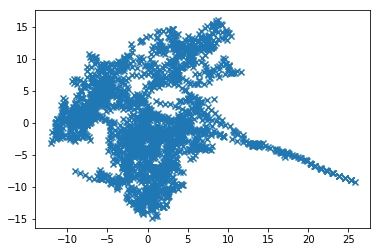

In [407]:
X_embedded = pca.fit_transform(location)
plt.scatter(X_embedded[:,1], X_embedded[:,0], marker='x')

In [410]:
max(X_embedded[:,0]) - min(X_embedded[:,0])

30.870622721134893

In [409]:
s_tree.l_measure_features()
s_tree.features

{'Average Radius': 0.04623375288734141,
 'Branch Pt': 462,
 'Depth Z': 42.018678885859046,
 'Euclidian Skewness': 30.781375201358223,
 'Height Y': 29.580508453257078,
 'Length': 1944.8355528613888,
 'Nbranch': array([462]),
 'Nnodes': array([2930]),
 'Nsoma': array([1]),
 'Section Area': 60.52848550597983,
 'Segments': 924,
 'Skewness X': 1.5851981937595423,
 'Skewness Y': 3.828235214034645,
 'Skewness Z': 30.501226551063773,
 'Soma Radii': 0.6245409794949293,
 'Soma Surface Area': 0.0,
 'Soma Volume': 0.0,
 'Soma X Position': 0.0,
 'Soma Y Position': 0.0,
 'Soma Z Position': 0.0,
 'Stems': 4,
 'Surface Area': 609.2409275830885,
 'Tips': 690,
 'Volume': 49.80491697655236,
 'Width X': 26.372494002479264,
 'branch order': array([4., 1., 1., ..., 0., 0., 0.]),
 'initial segments': array([4.])}

In [433]:
tree.location[0,:] = tree.location[0,:] - tree.location[0,0]
tree.location[1,:] = tree.location[1,:] - tree.location[1,0]
tree.location[2,:] = tree.location[2,:] - tree.location[2,0]
tree.location[2]

array([ 0.        ,  1.35423916,  1.92135833, ..., 38.00646775,
       38.18962467, 38.23031985])